# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Clarissa Luna Maheswari
- **Email:** clrsslunaaa@gmail.com
- **ID Dicoding:** clrssluna

## Menentukan Pertanyaan Bisnis

- Apakah jumlah sewa sepeda dipengaruhi oleh waktu dalam sehari?
- Apakah terdapat perubahan jumlah penyewaan sepeda saat hari libur atau akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
import zipfile
import calendar
import os
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path ke file CSV di Google Drive
csv_path = '/content/drive/MyDrive/Colab_Notebooks/Bike-sharing-dataset/day.csv'

# Baca dataset menggunakan pandas
day_df= pd.read_csv(csv_path)

# Tampilkan dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Path ke file CSV di Google Drive
csv_path = '/content/drive/MyDrive/Colab_Notebooks/Bike-sharing-dataset/hour.csv'

# Baca dataset menggunakan pandas
hour_df = pd.read_csv(csv_path)

# Tampilkan dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
print('dataframe day:')
day_df.info()

print('\ndataframe hour:')
hour_df.info()

dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entri

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# check duplicates
print("Dataframe day:", day_df.duplicated().sum())
print("Dataframe hour:", hour_df.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


In [ ]:
# descriptive statistics (numerical) :
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah nama kolom dalam DataFrame day_df dan hour_df sesuai dengan mapping yang telah ditentukan dalam column_mapping. Kolom-kolom yang diubah namanya antara lain: 'temp' menjadi 'temperature', 'weekday' menjadi 'days', 'yr' menjadi 'year', 'dteday' menjadi 'date', 'mnth' menjadi 'month', 'weathersit' menjadi 'weather', 'cnt' menjadi 'count', dan 'hum' menjadi 'humidity' untuk mempermudah pemahaman

In [ ]:
# Mendefinisikan mapping untuk perubahan nama kolom
column_mapping = {'temp': 'temperature', 'weekday': 'days', 'yr': 'year',
                  'dteday': 'date', 'mnth': 'month'}

# Menggunakan rename() untuk mengubah nama kolom sesuai dengan mapping yang telah ditentukan
day_df.rename(columns=column_mapping, inplace=True)

# Menampilkan DataFrame setelah perubahan nama kolom
print(day_df.head())

   instant        date  season  year  month  holiday  days  workingday  \
0        1  2011-01-01       1     0      1        0     6           0   
1        2  2011-01-02       1     0      1        0     0           0   
2        3  2011-01-03       1     0      1        0     1           1   
3        4  2011-01-04       1     0      1        0     2           1   
4        5  2011-01-05       1     0      1        0     3           1   

   weathersit  temperature     atemp       hum  windspeed  casual  registered  \
0           2     0.344167  0.363625  0.805833   0.160446     331         654   
1           2     0.363478  0.353739  0.696087   0.248539     131         670   
2           1     0.196364  0.189405  0.437273   0.248309     120        1229   
3           1     0.200000  0.212122  0.590435   0.160296     108        1454   
4           1     0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
# Mendefinisikan mapping untuk perubahan nama kolom
column_mapping = {'temp': 'temperature', 'weekday': 'days', 'yr': 'year',
                  'dteday': 'date', 'mnth': 'month'}

# Menggunakan rename() untuk mengubah nama kolom sesuai dengan mapping yang telah ditentukan
hour_df.rename(columns=column_mapping, inplace=True)

# Menampilkan DataFrame setelah perubahan nama kolom
print(hour_df.head())

   instant        date  season  year  month  hr  holiday  days  workingday  \
0        1  2011-01-01       1     0      1   0        0     6           0   
1        2  2011-01-01       1     0      1   1        0     6           0   
2        3  2011-01-01       1     0      1   2        0     6           0   
3        4  2011-01-01       1     0      1   3        0     6           0   
4        5  2011-01-01       1     0      1   4        0     6           0   

   weathersit  temperature   atemp   hum  windspeed  casual  registered  cnt  
0           1         0.24  0.2879  0.81        0.0       3          13   16  
1           1         0.22  0.2727  0.80        0.0       8          32   40  
2           1         0.22  0.2727  0.80        0.0       5          27   32  
3           1         0.24  0.2879  0.75        0.0       3          10   13  
4           1         0.24  0.2879  0.75        0.0       0           1    1  


Menggunakan fungsi astype() untuk mengonversi tipe data kolom "date" menjadi tipe data datetime dan mengubah tipe data kolom lainnya menjadi kategori.

In [ ]:
# Mengonversi kolom "date" menjadi tipe data datetime dan mengubah tipe data kolom lain menjadi kategori
day_df = day_df.astype({'date': 'datetime64',
                        'season': 'category',
                        'year': 'category',
                        'month': 'category',
                        'days': 'category',
                        'workingday': 'category'})

# Menampilkan informasi tentang tipe data DataFrame setelah perubahan
print(day_df.info())

# Pemeriksaan tipe data sebelum dan sesudah perubahan
print('Tipe data kolom "date" sebelum perubahan:', day_df["date"].dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    int64         
 6   days         731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    int64         
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
dtypes: categ

In [ ]:
hour_df['date'] = pd.to_datetime(hour_df['date'])

# Mengubah tipe data kolom-kolom lain menjadi kategori
columns_to_convert = ['season', 'year', 'month', 'days', 'workingday']
hour_df[columns_to_convert] = hour_df[columns_to_convert].astype('category')

# Menampilkan informasi tentang tipe data DataFrame setelah perubahan
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   days         17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

Menggunakan modul calendar untuk mengonversi angka bulan menjadi nama bulan.

In [ ]:
# Mengganti nilai dalam kolom 'month' dengan nama bulan
day_df['month'] = day_df['month'].apply(lambda x: calendar.month_name[x])

# Menampilkan lima baris pertama DataFrame setelah penggantian nilai
print(day_df.head())

   instant       date season year    month  holiday days workingday  \
0        1 2011-01-01      1    0  January        0    6          0   
1        2 2011-01-02      1    0  January        0    0          0   
2        3 2011-01-03      1    0  January        0    1          1   
3        4 2011-01-04      1    0  January        0    2          1   
4        5 2011-01-05      1    0  January        0    3          1   

   weathersit  temperature     atemp       hum  windspeed  casual  registered  \
0           2     0.344167  0.363625  0.805833   0.160446     331         654   
1           2     0.363478  0.353739  0.696087   0.248539     131         670   
2           1     0.196364  0.189405  0.437273   0.248309     120        1229   
3           1     0.200000  0.212122  0.590435   0.160296     108        1454   
4           1     0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
hour_df['month'] = hour_df['month'].replace(month_mapping)

# Menampilkan lima baris pertama DataFrame setelah penggantian nilai
print(hour_df.head())

   instant       date season year    month  hr  holiday days workingday  \
0        1 2011-01-01      1    0  January   0        0    6          0   
1        2 2011-01-01      1    0  January   1        0    6          0   
2        3 2011-01-01      1    0  January   2        0    6          0   
3        4 2011-01-01      1    0  January   3        0    6          0   
4        5 2011-01-01      1    0  January   4        0    6          0   

   weathersit  temperature   atemp   hum  windspeed  casual  registered  cnt  
0           1         0.24  0.2879  0.81        0.0       3          13   16  
1           1         0.22  0.2727  0.80        0.0       8          32   40  
2           1         0.22  0.2727  0.80        0.0       5          27   32  
3           1         0.24  0.2879  0.75        0.0       3          10   13  
4           1         0.24  0.2879  0.75        0.0       0           1    1  


Menggunakan metode drop() dengan parameter columns untuk menghapus kolom 'instant' dan 'holiday' dari DataFrame day_df dan hour_df karena tidak terlalu dibutuhkan.

## Exploratory Data Analysis (EDA)

Mengelompokkan data berdasarkan 'workingday' dan menghitung statistik untuk setiap kelompok. Statistik yang dihitung untuk kolom 'casual' dan 'registered' adalah nilai maksimum, minimum, dan rata-rata.Untuk kolom 'count', dihitung total jumlahnya

In [ ]:
summary_statistics = day_df.groupby(by='workingday').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'cnt': 'sum',
})

# Menampilkan ringkasan statistik
print(summary_statistics)

           casual                  registered                        cnt
              max min         mean        max  min         mean      sum
workingday                                                              
0            3410  54  1371.134199       5966  451  2959.034632  1000269
1            2469   2   606.570000       6946   20  3978.250000  2292410


Kita dapat melihat perbedaan yang signifikan dalam jumlah sewa sepeda antara hari kerja dan hari libur. Pada hari kerja, jumlah sewa sepeda yang dilakukan oleh pengguna yang memiliki langganan tetap ("registered" users) lebih tinggi dibandingkan dengan pengguna yang tidak memiliki langganan tetap ("casual" users), sementara pada hari libur, perbedaan antara kedua kelompok pengguna tidak terlalu besar. Jumlah total sewa sepeda pada hari kerja juga lebih tinggi dibandingkan dengan hari libur, yang menunjukkan pola penggunaan yang berbeda antara kedua jenis hari.

### Explore ...

In [ ]:
hour_df.describe(include="all")

<ipython-input-196-55b8ff84265d>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,instant,date,season,year,month,hr,holiday,days,workingday,weathersit,temperature,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379,17379.000000,17379.000000,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12,NaN,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,May,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496.0,8734.0,1488,NaN,NaN,2512.0,11865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,NaN,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [ ]:
day_df.describe(include="all")

<ipython-input-197-51e59b52191b>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,instant,date,season,year,month,holiday,days,workingday,weathersit,temperature,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731,731.000000,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,January,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62,NaN,105.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,NaN,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


 Menampilkan informasi tentang jumlah sewa sepeda yang dilakukan oleh dua kelompok berbeda: hari kerja (workingday=1) dan hari libur (workingday=0).

In [ ]:
summary_statistics = day_df.groupby(by='workingday').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
    'cnt': 'sum',
})

# Menampilkan ringkasan statistik
print(summary_statistics)

           casual                  registered                        cnt
              max min         mean        max  min         mean      sum
workingday                                                              
0            3410  54  1371.134199       5966  451  2959.034632  1000269
1            2469   2   606.570000       6946   20  3978.250000  2292410


Terlihat perbedaan yang signifikan dalam jumlah sewa sepeda antara hari kerja dan hari libur. Pada hari kerja, jumlah sewa sepeda yang dilakukan oleh pengguna yang memiliki langganan tetap ("registered" users) lebih tinggi dibandingkan dengan pengguna yang tidak memiliki langganan tetap ("casual" users), sementara pada hari libur, perbedaan antara kedua kelompok pengguna tidak terlalu besar. Jumlah total sewa sepeda pada hari kerja juga lebih tinggi dibandingkan dengan hari libur, yang menunjukkan pola penggunaan yang berbeda antara kedua jenis hari.

Melakukan analisis statistik sederhana terhadap data per jam pada DataFrame hour_df

In [ ]:
hourly_summary_statistics = hour_df.groupby('hr')['cnt'].describe()

# Menampilkan ringkasan statistik
print(hourly_summary_statistics)

    count        mean         std   min     25%    50%     75%    max
hr                                                                   
0   726.0   53.898072   42.307910   2.0   25.00   40.0   69.00  283.0
1   724.0   33.375691   33.538727   1.0   11.00   20.0   42.25  168.0
2   715.0   22.869930   26.578642   1.0    5.00   11.0   28.50  132.0
3   697.0   11.727403   13.239190   1.0    3.00    6.0   15.00   79.0
4   697.0    6.352941    4.143818   1.0    3.00    6.0    8.00   28.0
5   717.0   19.889819   13.200765   1.0    8.00   19.0   29.00   66.0
6   725.0   76.044138   55.084348   1.0   23.00   76.0  117.00  213.0
7   727.0  212.064649  161.441936   1.0   55.50  208.0  332.00  596.0
8   727.0  359.011004  235.189285   5.0  131.50  385.0  559.50  839.0
9   727.0  219.309491   93.703458  14.0  155.00  216.0  293.00  426.0
10  727.0  173.668501  102.205413   8.0  106.00  147.0  218.00  539.0
11  727.0  208.143054  127.495536  10.0  123.00  180.0  256.00  663.0
12  728.0  253.31593

Dari ringkasan statistik tersebut, kita dapat melihat bagaimana jumlah sewa sepeda (cnt) bervariasi berdasarkan waktu dalam sehari (hr).

Rata-rata jumlah sewa sepeda meningkat seiring dengan berjalannya waktu dalam sehari. Jumlah sewa sepeda memiliki variasi yang signifikan, dengan standar deviasi yang cukup tinggi di sebagian besar jam dalam sehari.
Rentang nilai jumlah sewa sepeda (dari minimum hingga maksimum) juga bervariasi di setiap jam, menunjukkan pola penggunaan sepeda yang berbeda-beda selama berbagai waktu dalam sehari.
Dengan demikian, dapat disimpulkan bahwa waktu dalam sehari memiliki pengaruh yang signifikan terhadap jumlah sewa sepeda, dengan pola penggunaan yang berbeda-beda di setiap jamnya.

statistik deskriptif untuk jumlah penyewaan sepeda (cnt) berdasarkan hari kerja dan hari libur

In [ ]:
# Menampilkan statistik deskriptif untuk jumlah penyewaan sepeda (cnt) berdasarkan hari kerja
weekday_stats = day_df[day_df['workingday'] == 1]['cnt'].describe()

# Menampilkan statistik deskriptif untuk jumlah penyewaan sepeda (cnt) berdasarkan hari libur
holiday_stats = day_df[day_df['workingday'] == 0]['cnt'].describe()

print("Statistik Jumlah Penyewaan Sepeda (cnt) pada Hari Kerja:")
print(weekday_stats)

print("\nStatistik Jumlah Penyewaan Sepeda (cnt) pada Hari Libur:")
print(holiday_stats)

Statistik Jumlah Penyewaan Sepeda (cnt) pada Hari Kerja:
count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: cnt, dtype: float64

Statistik Jumlah Penyewaan Sepeda (cnt) pada Hari Libur:
count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: cnt, dtype: float64



Dari hasil statistik di atas, terlihat bahwa

Pada hari kerja, rata-rata jumlah penyewaan sepeda (cnt) adalah sekitar 4584.82 dengan standar deviasi sekitar 1878.42. Jumlah penyewaan sepeda bervariasi dari 22 hingga 8362.
Pada hari libur, rata-rata jumlah penyewaan sepeda (cnt) adalah sekitar 4330.17 dengan standar deviasi sekitar 2052.14. Jumlah penyewaan sepeda bervariasi dari 605 hingga 8714.
Dari perbandingan statistik ini, terlihat bahwa rata-rata jumlah penyewaan sepeda (cnt) cenderung sedikit lebih rendah pada hari libur daripada pada hari kerja, meskipun variansinya relatif serupa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah sewa sepeda dipengaruhi oleh waktu dalam sehari?

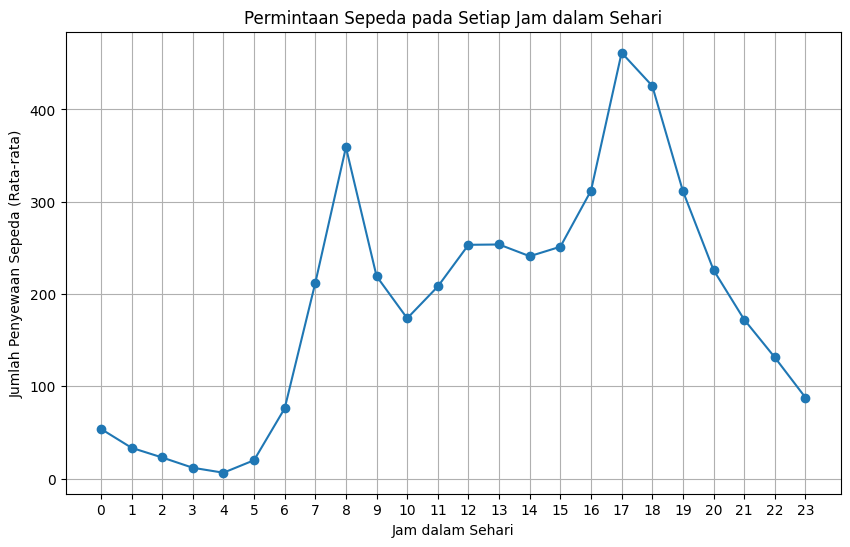

In [ ]:
# Menghitung jumlah penyewaan sepeda pada setiap jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.plot(hourly_rentals['hr'], hourly_rentals['cnt'], marker='o')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan Sepeda (Rata-rata)')
plt.title('Permintaan Sepeda pada Setiap Jam dalam Sehari')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

Grafik di atas menunjukkan adanya perbedaan dalam permintaan sepeda pada setiap jam dalam sehari. Permintaan terendah terjadi sekitar jam 4 pagi, sedangkan permintaan tertinggi terjadi sekitar jam 17.00.

### Pertanyaan 2: Apakah terdapat perubahan jumlah penyewaan sepeda saat hari libur atau akhir pekan?

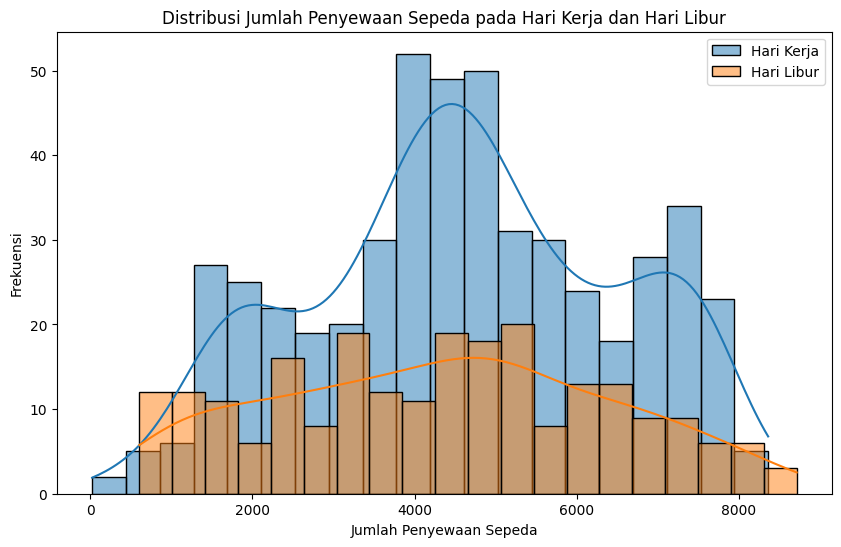

In [ ]:
# Hitung total penyewaan sepeda per hari
daily_rentals = hour_df.groupby('date')['cnt'].sum().reset_index()

# Identifikasi hari kerja dan hari libur
working_days = day_df[day_df['workingday'] == 1]['date']
holidays = day_df[day_df['workingday'] == 0]['date']

# Pisahkan data penyewaan sepeda berdasarkan hari kerja dan hari libur
rentals_working_days = daily_rentals[daily_rentals['date'].isin(working_days)]['cnt']
rentals_holidays = daily_rentals[daily_rentals['date'].isin(holidays)]['cnt']

# Menghitung persentase penyewaan sepeda pada hari kerja dan hari libur
total_working_days = rentals_working_days.sum()
total_holidays = rentals_holidays.sum()
percentage_working_days = (total_working_days / (total_working_days + total_holidays)) * 100
percentage_holidays = (total_holidays / (total_working_days + total_holidays)) * 100

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(rentals_working_days, bins=20, alpha=0.5, label='Hari Kerja', kde=True)
sns.histplot(rentals_holidays, bins=20, alpha=0.5, label='Hari Libur', kde=True)
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.legend()
plt.show()

Pada grafik di atas terlihata bahwa jumlah penyewaan sepeda pada hari kerja memiliki fluktuasi dan angka yang lebih tinggi dibandingkan pada hari libur.

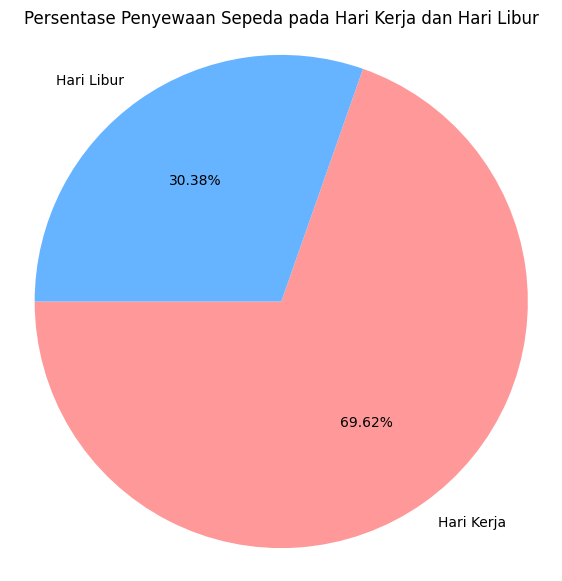

In [ ]:
import matplotlib.pyplot as plt

# Warna untuk setiap bagian pie chart
colors = ['#ff9999','#66b3ff']

# Menghitung persentase penyewaan sepeda pada hari kerja dan hari libur
labels = ['Hari Kerja', 'Hari Libur']
sizes = [percentage_working_days, percentage_holidays]

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=180)
plt.title('Persentase Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.axis('equal')  # Ensure pie chart is drawn as a circle
plt.show()


Pie chart di atas memberikan informasi persentase penyewaan sepeda pada hari kerja dan hari libur yakni 69.6% dan 30.4%.

## Conclusion

- Conclution pertanyaan 1

Grafik distribusi jumlah penyewaan sepeda menunjukkan adanya perbedaan permintaan sepeda pada setiap jam dalam sehari.
Permintaan sepeda cenderung rendah pada jam-jam pagi (terendah sekitar jam 4 pagi) dan meningkat secara signifikan pada sore hari (tertinggi sekitar jam 5 sore). Hal ini menunjukkan bahwa waktu mempengaruhi permintaan sepeda, dengan puncak permintaan terjadi saat jam pulang kerja.

- Conclution pertanyaan 2

Analisis statistik menunjukkan bahwa rata-rata jumlah penyewaan sepeda pada hari kerja dan hari libur memiliki perbedaan yang cukup signifikan. Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja daripada hari libur.

Dengan demikian, dapat disimpulkan bahwa waktu dalam sehari berpengaruh terhadap permintaan sepeda, sementara terdapat perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur.

In [ ]:
# Simpan dataframe ke dalam file CSV
hour_df.to_csv('cleaned_hour.csv', index=False)